
Bayesian Ridge Regression

Computes a Bayesian Ridge Regression on a synthetic dataset.

See :ref:`bayesian_ridge_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient
weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the
estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the
marginal log-likelihood of the observations.



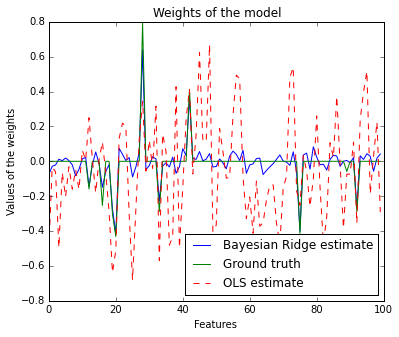

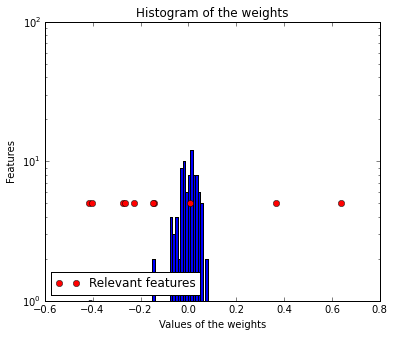

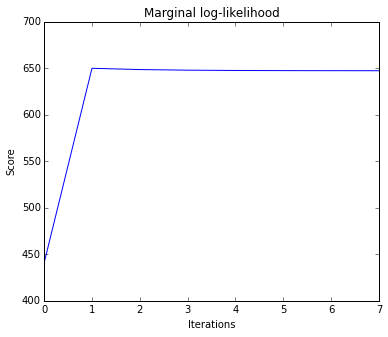

In [3]:
"""
=========================
Bayesian Ridge Regression
=========================

Computes a Bayesian Ridge Regression on a synthetic dataset.

See :ref:`bayesian_ridge_regression` for more information on the regressor.

Compared to the OLS (ordinary least squares) estimator, the coefficient
weights are slightly shifted toward zeros, which stabilises them.

As the prior on the weights is a Gaussian prior, the histogram of the
estimated weights is Gaussian.

The estimation of the model is done by iteratively maximizing the
marginal log-likelihood of the observations.
"""
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import BayesianRidge, LinearRegression
%matplotlib inline
###############################################################################
# Generating simulated data with Gaussian weigthts
np.random.seed(0)
n_samples, n_features = 100, 100
X = np.random.randn(n_samples, n_features)  # Create Gaussian data
# Create weigts with a precision lambda_ of 4.
lambda_ = 4.
w = np.zeros(n_features)
# Only keep 10 weights of interest
relevant_features = np.random.randint(0, n_features, 10)
for i in relevant_features:
    w[i] = stats.norm.rvs(loc=0, scale=1. / np.sqrt(lambda_))
# Create noise with a precision alpha of 50.
alpha_ = 50.
noise = stats.norm.rvs(loc=0, scale=1. / np.sqrt(alpha_), size=n_samples)
# Create the target
y = np.dot(X, w) + noise

###############################################################################
# Fit the Bayesian Ridge Regression and an OLS for comparison
clf = BayesianRidge(compute_score=True)
clf.fit(X, y)

ols = LinearRegression()
ols.fit(X, y)

###############################################################################
# Plot true weights, estimated weights and histogram of the weights
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")
plt.plot(clf.coef_, 'b-', label="Bayesian Ridge estimate")
plt.plot(w, 'g-', label="Ground truth")
plt.plot(ols.coef_, 'r--', label="OLS estimate")
plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

plt.figure(figsize=(6, 5))
plt.title("Histogram of the weights")
plt.hist(clf.coef_, bins=n_features, log=True)
plt.plot(clf.coef_[relevant_features], 5 * np.ones(len(relevant_features)),
         'ro', label="Relevant features")
plt.ylabel("Features")
plt.xlabel("Values of the weights")
plt.legend(loc="lower left")

plt.figure(figsize=(6, 5))
plt.title("Marginal log-likelihood")
plt.plot(clf.scores_)
plt.ylabel("Score")
plt.xlabel("Iterations")
plt.show()
